In [9]:
import os
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# ImageDataGenerator를 통해 데이터 전처리 및 증강
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './random_sorted_datasets/train/',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    './random_sorted_datasets/validation/',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')


Found 13650 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:


# 모델 정의 (입력 크기 300x300으로 변경)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),  # 입력 크기 300x300
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 이진 분류
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 데이터셋 경로 설정
train_dir = './dataset/horse-or-human/train/'
validation_dir = './dataset/horse-or-human/validation/'


In [14]:

# 모델 학습 (조기 종료 콜백 포함)
history = model.fit(
    train_generator,
    steps_per_epoch=50,  # 학습 데이터셋 크기에 따른 스텝 계산
    epochs=20,  # 최대 20 에포크
    validation_data=validation_generator,
    validation_steps=50,  # 검증 데이터셋 크기에 따른 스텝 계산
    callbacks=[early_stopping])  # 조기 종료 콜백 추가

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.7584 - loss: 0.4722

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-06 13:33:48.829280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:33:48.829363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:33:48.829600: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:33:48.829614: I tensorflow/core/framework/local_rendezvous.cc:422] Loc

50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7592 - loss: 0.4716 - val_accuracy: 0.7890 - val_loss: 0.6471
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 939ms/step - accuracy: 0.8715 - loss: 0.3100 - val_accuracy: 0.7690 - val_loss: 0.8683
Epoch 3/20


2024-09-06 13:34:36.109445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:34:36.109493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:34:36.109735: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:34:36.109745: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13538980916057320875
2024-09-06 13:34:36.109760: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10385440769276206787


50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 983ms/step - accuracy: 0.8926 - loss: 0.2389 - val_accuracy: 0.8770 - val_loss: 0.5403
Epoch 4/20


2024-09-06 13:35:25.156572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:35:25.156613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:35:25.156869: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:35:25.156879: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13538980916057320875
2024-09-06 13:35:25.156893: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10385440769276206787


50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 949ms/step - accuracy: 0.8829 - loss: 0.2611 - val_accuracy: 0.7560 - val_loss: 0.9186
Epoch 5/20


2024-09-06 13:36:12.612197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:36:12.612237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:36:12.612431: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:36:12.612442: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13538980916057320875
2024-09-06 13:36:12.612451: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10385440769276206787


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.9169 - loss: 0.2076

2024-09-06 13:36:56.724217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:36:56.724246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:36:56.724425: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:36:56.724436: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13538980916057320875
2024-09-06 13:36:56.724446: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10385440769276206787


50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 884ms/step - accuracy: 0.9168 - loss: 0.2077 - val_accuracy: 0.8570 - val_loss: 0.5080
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 789ms/step - accuracy: 0.9056 - loss: 0.2132 - val_accuracy: 0.8370 - val_loss: 0.6965
Epoch 7/20


2024-09-06 13:37:36.331280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:37:36.331314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:37:36.331537: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:37:36.331544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13538980916057320875
2024-09-06 13:37:36.331553: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10385440769276206787


50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 980ms/step - accuracy: 0.9227 - loss: 0.1741 - val_accuracy: 0.8420 - val_loss: 0.7273
Epoch 8/20


2024-09-06 13:38:25.159096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:38:25.159125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Shape/_6]]
2024-09-06 13:38:25.159314: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11942898360562198555
2024-09-06 13:38:25.159325: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13538980916057320875
2024-09-06 13:38:25.159336: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10385440769276206787


50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9357 - loss: 0.1559 - val_accuracy: 0.8300 - val_loss: 1.7834


2024-09-06 13:39:18.358140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-06 13:39:18.358239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


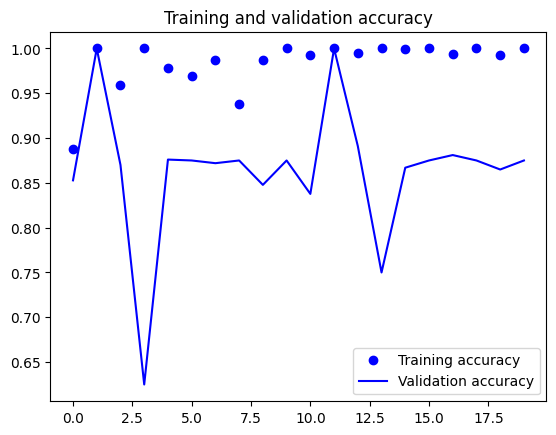

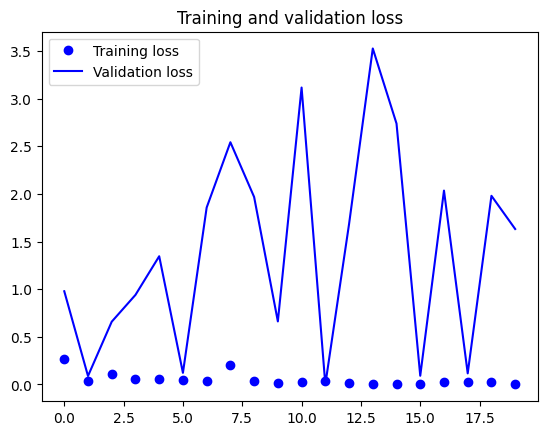

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

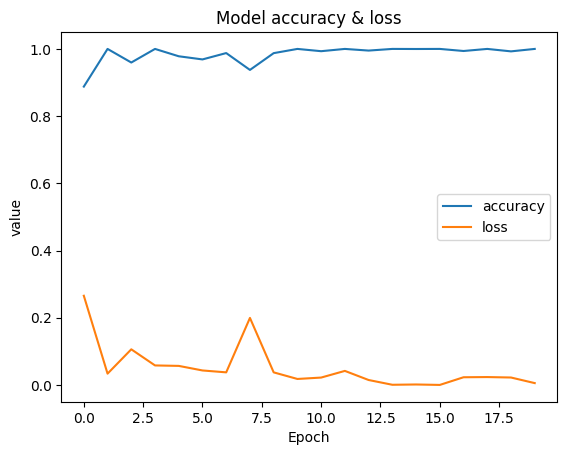

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy & loss')
plt.xlabel('Epoch')
plt.ylabel('value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

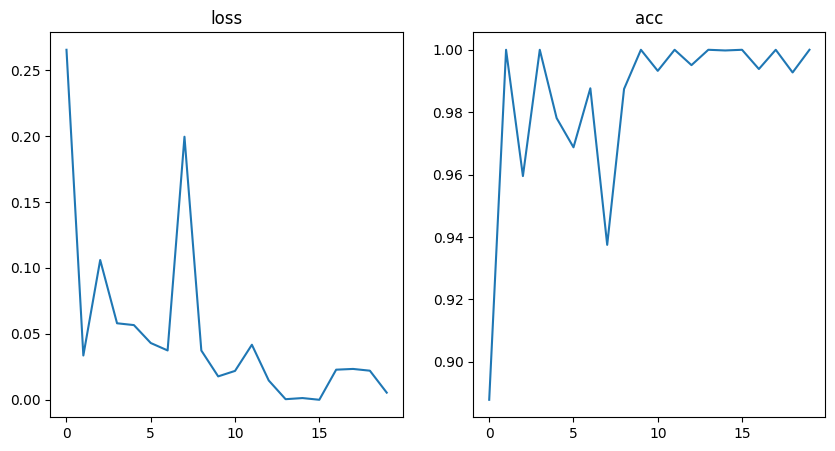

In [10]:
#loss, acc 현황을 그래프로 확인
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("acc")
plt.plot(history.history['accuracy'])
plt.show()

In [11]:
# 모델 검증
results = model.evaluate(validation_generator)
print("test loss, test acc:", results)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8819 - loss: 1.6542
test loss, test acc: [1.627497911453247, 0.8790000081062317]


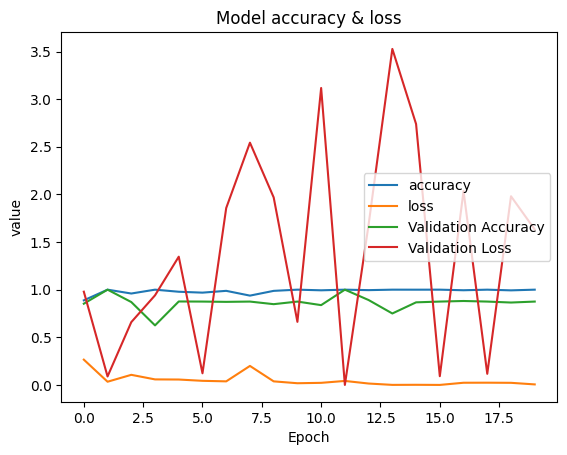

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])

plt.title("Model accuracy & loss")
plt.xlabel("Epoch")
plt.ylabel("value")
plt.legend(
    ["accuracy", "loss", "Validation Accuracy", "Validation Loss"], loc="center right"
)
plt.show()

In [32]:
# 이미지 경로 설정
dlist = './dataset/horse-or-human/test/'
predict_list = [f for f in os.listdir(dlist) if f.lower().endswith(('jpg', 'jpeg', 'png', 'webp'))]  # 이미지 파일만 선택

# 실제 레이블 설정 (파일 이름에 따라 설정)
true_labels = []
for file_name in predict_list:
    if "human" in file_name or "사람" in file_name:  # 사람을 나타내는 파일명에 따라 레이블 설정
        true_labels.append(1)
    elif "horse" in file_name or "말" in file_name:  # 말을 나타내는 파일명에 따라 레이블 설정
        true_labels.append(0)
        
print(len(true_labels),len(predict_list))

# 실제 레이블과 예측할 이미지 개수가 일치하는지 확인
assert len(true_labels) == len(predict_list), "레이블과 이미지 파일 개수가 일치하지 않습니다."

# 이미지 전처리
img = [cv2.imread(dlist + i) for i in predict_list]
img = [cv2.resize(i, (300, 300)) for i in img]  # 모델 입력 크기에 맞게 이미지 크기 조정
img = np.array(img)
img = img.astype('float32') / 255.0  # 정규화

# 분류
cutoff = 0.5
predictions = model.predict(img)

# 예측 결과 출력 및 맞춘 비율 계산
correct_count = 0
total_count = len(predictions)

for idx, prediction in enumerate(predictions):
    file_name = predict_list[idx]
    confidence = float(prediction)  # 예측 확률 (맞춤 비율)
    predicted_label = 1 if confidence >= cutoff else 0  # cutoff에 따른 예측 레이블
    
    # 실제 레이블과 예측 레이블을 비교
    if predicted_label == true_labels[idx]:
        correct_count += 1  # 맞춘 경우 카운트 증가
    
    # 파일 이름과 확률 출력
    if predicted_label == 1:
        print(f"{file_name}: 사람, 확률: {confidence:.2f}")
    else:
        print(f"{file_name}: 말, 확률: {1 - confidence:.2f}")

# 전체 맞춘 비율 (정확도) 계산
accuracy = correct_count / total_count
print(f"\n전체 맞춘 비율(정확도): {accuracy * 100:.2f}%")

46 46
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step  
horse_15.webp: 말, 확률: 1.00
horse_16.jpg: 말, 확률: 0.82
horse_13.webp: 말, 확률: 0.98
horse_17.jpg: 말, 확률: 1.00
human_19.jpg: 말, 확률: 0.97
horse_14.jpg: 말, 확률: 0.64
human_18.jpg: 말, 확률: 0.51
human_20.jpg: 사람, 확률: 0.98
human_08.jpg: 말, 확률: 0.93
horse_04.jpg: 말, 확률: 0.88
horse_10.jpg: 말, 확률: 0.53
horse_11.jpg: 사람, 확률: 0.70
horse_05.jpg: 말, 확률: 0.99
human_09.jpg: 말, 확률: 0.96
human_21.jpg: 말, 확률: 0.95
human_23.jpg: 말, 확률: 0.96
horse_07.jpg: 사람, 확률: 0.83
horse_01.jpeg: 말, 확률: 0.87
horse_06.jpg: 말, 확률: 0.95
horse_12.jpg: 말, 확률: 0.58
human_22.jpg: 말, 확률: 0.93
human_13.jpg: 사람, 확률: 0.55
human_07.jpg: 사람, 확률: 0.98
horse_23.jpg: 사람, 확률: 0.80
horse_02.jpeg: 말, 확률: 0.98
horse_22.jpg: 말, 확률: 0.70
human_06.jpg: 사람, 확률: 1.00
human_12.jpg: 말, 확률: 0.52
human_04.jpg: 말, 확률: 1.00
human_10.jpg: 사람, 확률: 1.00
horse_20.jpg: 말, 확률: 0.61
horse_08.jpg: 사람, 확률: 0.89
horse_09.jpg: 말, 확률: 0.70
horse_21.jpg: 말, 확률: 0.70
human_11.jpg: 말, 확률: 0.70
human_05.jpg: 말, 확률: 0.70
human_0

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_57321/2347227424.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(prediction)  # 예측 확률 (맞춤 비율)
